**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
# write your code here

## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $(1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

### Question 1:

Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

In [2]:
from sympy import symbols, diff, solve, sqrt, simplify, log, init_printing
from sympy.abc import alpha, kappa, nu, w, tau, L

w_tilde = (1-tau)*w

wtilde = symbols('wtilde')  # real wage

# define nu as strictly positive
nu = symbols('nu', positive=True)

# Define the variables
C = kappa + wtilde*L
G = symbols('G')  # government consumption
V = log(C**alpha * G**(1-alpha)) - nu*(L**2/2)  # utility function

# Derive the utility function with respect to labor
dV_dL = diff(V, L)

# Solve the first order condition for labor
L_star = solve(dV_dL, L)

# Print the solution
print("The optimal labor supply choice is:")

# simplify the solution
L_star = simplify(L_star[1])

display(L_star)


    

The optimal labor supply choice is:


-kappa/(2*wtilde) + sqrt(4*alpha*wtilde**2 + kappa**2*nu)/(2*sqrt(nu)*wtilde)

### Question 2:

Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

Optimal labor supply equation:


(-kappa + sqrt(4*alpha*w_tilde**2/nu + kappa**2))/(2*w_tilde)

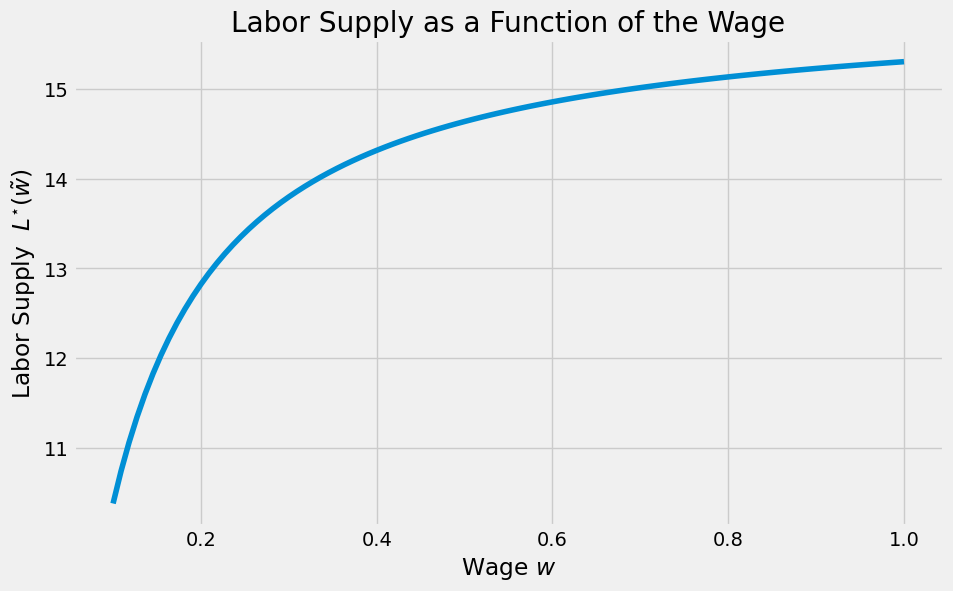

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols, sqrt

# Define symbols
kappa, alpha, nu, w_tilde = symbols('kappa alpha nu w_tilde')

# Define the equation for optimal labor supply
L_star_w = (-kappa + sqrt(kappa**2 + 4*(alpha/(nu))*w_tilde**2))/(2*w_tilde)
L_star_full = L_star_w.subs(w_tilde, (1-tau)*w)

# Display the equation
print("Optimal labor supply equation:")
display(L_star_w)

# Define the values for w_vec
w_vec = np.linspace(0.1, 1, 100)

# Define the baseline parameters
alpha = 0.5
kappa = 1.0
nu = 1/(2*16**2)
tau = 0.30

# Calculate the corresponding w_tilde values
w_tilde_vec = (1 - tau) * w_vec

# Calculate the optimal labor supply for each w_tilde value
L_vec = []
for w_tilde_val in w_tilde_vec:
    L_star_w_val = (-kappa + sqrt(kappa**2 + 4*(alpha/(nu))*w_tilde_val**2))/(2*w_tilde_val)
    L_vec.append(L_star_w_val)

# Plot the results
plt.style.use('fivethirtyeight')
fig = plt.figure()

# create fig size
fig.set_figwidth(10)
fig.set_figheight(6)


ax = fig.add_subplot(1, 1, 1)
ax.plot(w_vec, L_vec)
ax.set_xlabel('Wage ' + r'$w$')
ax.set_ylabel('Labor Supply  ' + r'$L^{\star}(\tilde{w})$')
ax.set_title('Labor Supply as a Function of the Wage')
plt.show()



We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

### Question 3:

Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


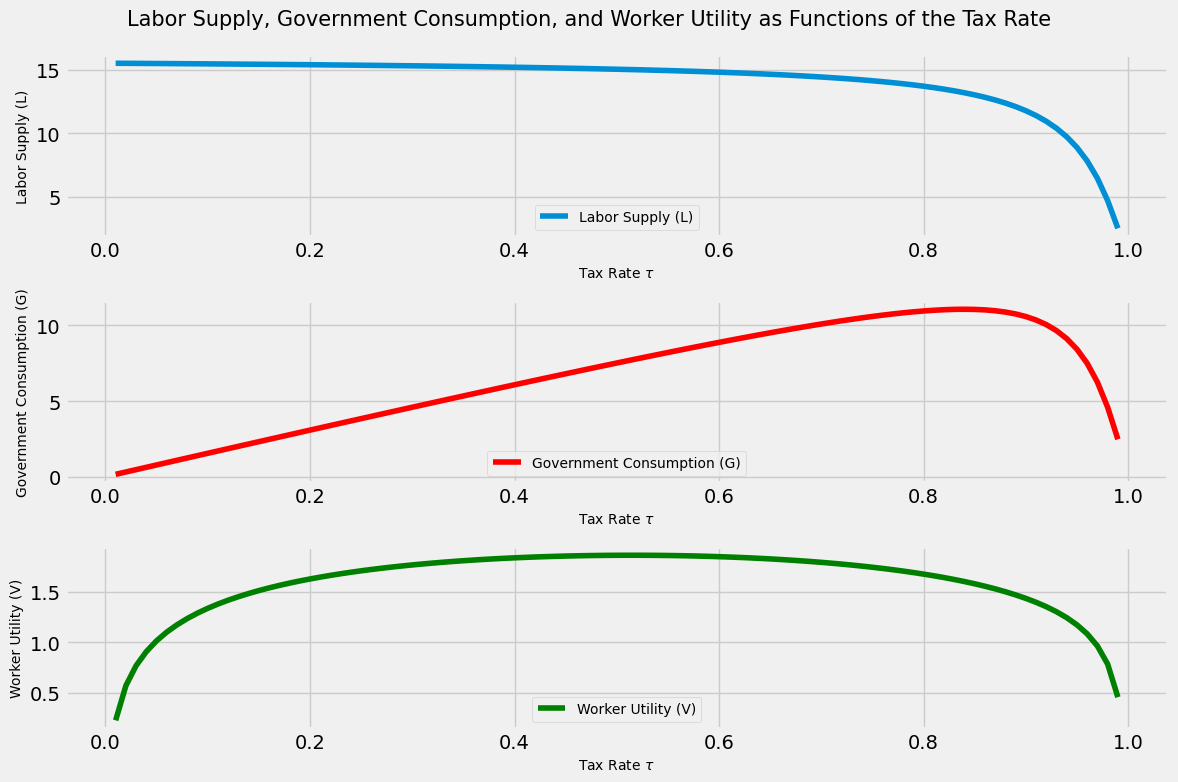

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, log


# Define the baseline parameters
alpha = 0.5
kappa = 1.0
nu = 1/(2*16**2)
w = 1.0
tau_values = np.linspace(0.01, 0.99, 99)

# Calculate L for each tau value
L_values = [(-kappa + sqrt(kappa**2 + 4*(alpha/nu)*((1 - tau)*w)**2))/(2*((1 - tau)*w)) for tau in tau_values]

# Calculate G for each tau value
G_values = [tau * w * L for tau, L in zip(tau_values, L_values)]

# Calculate V for each tau value
V_values = [log((kappa + (1 - tau)*w*L)**alpha * G**(1 - alpha)) - nu*L**2/2 for tau, L, G in zip(tau_values, L_values, G_values)]

# Plot L, G, and V as functions of tau
plt.figure(figsize=(12, 8))

# create title for the whole plot
plt.suptitle('Labor Supply, Government Consumption, and Worker Utility as Functions of the Tax Rate', fontsize = 15)

# create fig size
fig.set_figwidth(15)
fig.set_figheight(10)

# create subplots
plt.subplot(3, 1, 1)
plt.plot(tau_values, L_values, label='Labor Supply (L)')
plt.xlabel('Tax Rate ' +r'$\tau$', fontsize = 10)
plt.ylabel(r'Labor Supply (L)', size = 10)
plt.legend(fontsize = 10, loc = 'lower center')

plt.subplot(3, 1, 2)
plt.plot(tau_values, G_values, label='Government Consumption (G)', color = 'red')
plt.xlabel('Tax Rate ' +r'$\tau$', fontsize = 10)
plt.ylabel(r'Government Consumption (G)', size = 10)
plt.legend(fontsize = 10, loc = 'lower center')

plt.subplot(3, 1, 3)
plt.plot(tau_values, V_values, label='Worker Utility (V)', color = 'green')
plt.xlabel('Tax Rate ' +r'$\tau$', fontsize = 10)
plt.ylabel(r'Worker Utility (V)', size = 10)
plt.legend(fontsize = 10, loc = 'lower center')

plt.tight_layout()
plt.show()



### Question 4:

Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

The optimal tax rate is:  0.51
The corresponding Worker Utility is:  1.8591603818974627


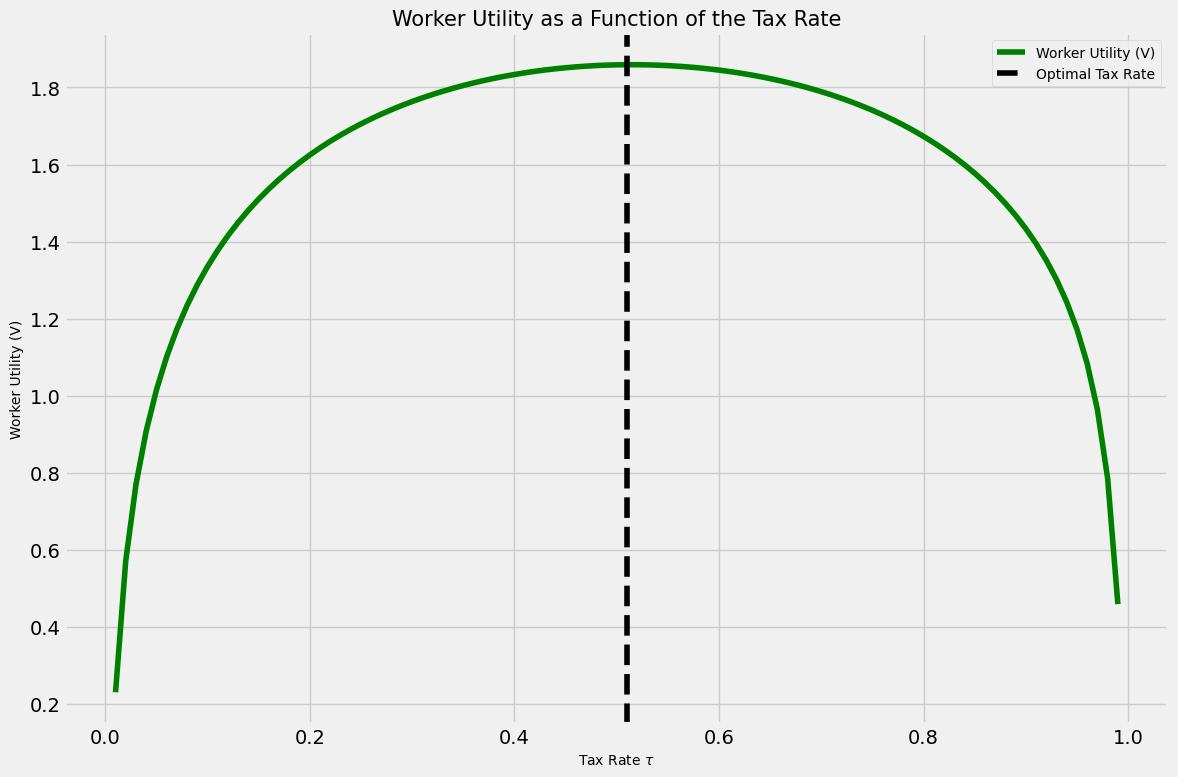

In [16]:
# find the socially optimal tax rate, which maximizes the worker utility

# Define the baseline parameters
alpha = 0.5
kappa = 1.0
nu = 1/(2*16**2)
w = 1.0
tau_values = np.linspace(0.01, 0.99, 99)

# Calculate V for each tau value 
V_values = [log((kappa + (1 - tau)*w*L)**alpha * G**(1 - alpha)) - nu*L**2/2 for tau, L, G in zip(tau_values, L_values, G_values)]

# find the index of the maximum value of V
max_index = V_values.index(max(V_values))

# find the corresponding tau value
optimal_tau = tau_values[max_index]

# print the result
print("The optimal tax rate is: ", optimal_tau)
print("The corresponding Worker Utility is: ", max(V_values))


# Illustrate the optimal tax rate with a plot, which shows the worker utility as a function of the tax rate and a vertical line at the optimal tax rate
# Plot V as a function of tau
plt.figure(figsize=(12, 8))

# create title
plt.title('Worker Utility as a Function of the Tax Rate', fontsize = 15)

# define fig size
fig.set_figwidth(15)
fig.set_figheight(10)

# create plot
plt.plot(tau_values, V_values, label='Worker Utility (V)', color = 'green')

# create vertical line at the optimal tax rate
plt.axvline(x = optimal_tau, color = "black", linestyle = '--', label = 'Optimal Tax Rate')

# create labels
plt.xlabel('Tax Rate ' +r'$\tau$', fontsize = 10)
plt.ylabel(r'Worker Utility (V)', size = 10)
plt.legend(fontsize = 10)
plt.tight_layout()

# show plot
plt.show()


A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma}{\sigma-1}} \right)^{\frac{\sigma}{1-\sigma} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

### Question 5:

Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

In [22]:
# write your code here

# define the the new value for G
tau = symbols('tau')
w = symbols('w')

G = tau * w * L_star_full

display(G)

tau*(-kappa + sqrt(4*alpha*w**2*(1 - tau)**2/nu + kappa**2))/(2*(1 - tau))

### Question 6:

Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

In [ ]:
# write your code here  

## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

In [ ]:
# write your code here

We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

In [ ]:
# write your code here 

Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

In [ ]:
# write your code here

**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

In [ ]:
# write your code here


**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.



In [ ]:
# write your code here

## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

In [ ]:
def griewank(x):
    return griewank_(x[0],x[1])
    
def griewank_(x1,x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A-B+1

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

In [ ]:
# write your code here

**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

In [ ]:
# write your code here